## KNN Analysis ##
In this task we want to apply KNN classifier to financial data. As a data source YahooFinance is used.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

             Open        High         Low       Close  Open-Close    High-Low
count  253.000000  253.000000  253.000000  253.000000  253.000000  253.000000
mean   116.521976  117.972925  115.005534  116.498932    0.023044    2.967391
std     11.875965   11.437334   12.051416   11.697367    2.237908    1.868568
min     76.910004   80.570000   71.660004   72.860001   -7.559998    0.470001
25%    107.720001  108.639999  106.779999  107.820000   -1.090012    1.720001
50%    117.779999  118.889999  115.699997  117.550003   -0.129997    2.480003
75%    126.559998  127.720001  125.339996  126.440002    1.060005    3.570000
max    139.500000  139.500000  135.000000  137.279999    9.820007   10.650002


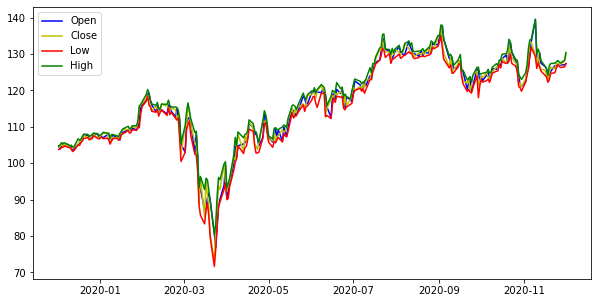

In [3]:
from pandas_datareader import data as pdr
import yfinance as yf

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

df = pdr.get_data_yahoo('NDAQ', '2019-12-01', '2020-12-01')
df = df.dropna()
df = df[['Open', 'High', 'Low','Close']]

df['Open-Close']= df.Open - df.Close
df['High-Low']  = df.High - df.Low
df = df.dropna()

X = df[['Open-Close', 'High-Low']]
Y = np.where(df['Close'].shift(-1) > df['Close'], 1, -1)

print(df.describe())

opens = df[['Open']]
closes = df[['Close']]
lows = df[['Low']]
highs = df[['High']]

plt.figure(figsize=(10,5))
plt.plot(opens, color='b',label = 'Open')
plt.plot(closes, color='y',label = 'Close')
plt.plot(lows, color='r',label = 'Low')
plt.plot(highs, color='g',label = 'High')
plt.legend()
plt.show()

Train_data Accuracy: 0.76
Test_data Accuracy: 0.53


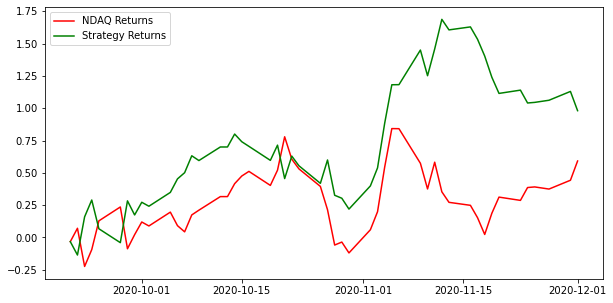

Sharpe ratio: 0.94


In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

from pandas_datareader import data as pdr
import yfinance as yf

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

df = pdr.get_data_yahoo('NDAQ', '2019-12-01', '2020-12-01')
df = df.dropna()
df = df[['Open', 'High', 'Low','Close']]

df['Open-Close']= df.Open - df.Close
df['High-Low']  = df.High - df.Low
df = df.dropna()

X = df[['Open-Close', 'High-Low']]
Y = np.where(df['Close'].shift(-1) > df['Close'], 1, -1)

split_percentage = 0.80
split = int(split_percentage*len(df))

X_train = X[:split]
Y_train = Y[:split]

X_test = X[split:]
Y_test = Y[split:]

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, Y_train)

accuracy_train = accuracy_score(Y_train, knn.predict(X_train))
accuracy_test = accuracy_score(Y_test, knn.predict(X_test))

print ('Train_data Accuracy: %.2f' %accuracy_train)
print ('Test_data Accuracy: %.2f' %accuracy_test)

df['Predicted_Signal'] = knn.predict(X)

df['NDAQ_returns'] = np.log(df['Close']/df['Close'].shift(1))
Cumulative_NDAQ_returns = df[split:]['NDAQ_returns'].cumsum()*10

df['Startegy_returns'] = df['NDAQ_returns']* df['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns = df[split:]['Startegy_returns'].cumsum()*10

plt.figure(figsize=(10,5))
plt.plot(Cumulative_NDAQ_returns, color='r',label = 'NDAQ Returns')
plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Returns')
plt.legend()
plt.show()

Std = Cumulative_Strategy_returns.std()
Sharpe = (Cumulative_Strategy_returns-Cumulative_NDAQ_returns)/Std
Sharpe = Sharpe.mean()
print('Sharpe ratio: %.2f'%Sharpe )